In [1]:
%load_ext autoreload
%autoreload 2

In [ ]:
import pandas as pd

from data_loader import load_folder, df_to_windows, split_and_scale

from models.sklearn_models import LogisticRegression
from training.trainer_sklearn import train_sklearn
from evaluation.metrics import evaluate
from evaluation.plots import plot_confusion_matrix

from collections import Counter

In [5]:
from sklearn.ensemble import RandomForestClassifier

class RandomForestModel:
    def __init__(self):
        self.model = RandomForestClassifier(
            n_estimators=200,
            max_depth=None,
            min_samples_leaf=5,
            class_weight="balanced",
            random_state=42,
            n_jobs=-1,
        )

    def fit(self, X, y):
        self.model.fit(X, y)

    def predict(self, X):
        return self.model.predict(X)

Counter({0: 32890, 1: 18626})
              precision    recall  f1-score   support

           0       0.73      0.40      0.51      8315
           1       0.40      0.73      0.52      4565

    accuracy                           0.52     12880
   macro avg       0.57      0.57      0.52     12880
weighted avg       0.61      0.52      0.52     12880



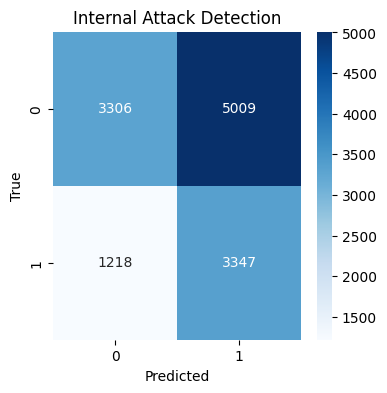

In [7]:
BASE = "../data/raw/boun-mouse-dynamics-dataset/users"

df_user, _ = load_folder(f"{BASE}/user1/training")
df_att, _ = load_folder(f"{BASE}/user1/internal_tests")

df_user["label"] = 1
df_att["label"] = 0

X, y = df_to_windows(pd.concat([df_user, df_att]))
X_tr, X_te, y_tr, y_te, _ = split_and_scale(X, y)

print(Counter(y_tr))

model = LogisticRegression(class_weight="balanced")
train_sklearn(model, X_tr, y_tr)

pred = model.predict(X_te)
cm = evaluate(y_te, pred)
plot_confusion_matrix(cm, "Internal Attack Detection")
